<a href="https://colab.research.google.com/github/rjscherrer/reinforcement-learning-tasks/blob/main/chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2.4

$$
\begin{align}
Q_{n+1} &= Q_n + \alpha_n[R_n - Q_n] \\
&= \alpha_n R_n + (1 - \alpha_n)Q_n \\
&= \alpha_n R_n + (1 - \alpha_n)(\alpha_{n-1} R_{n-1} + (1 - \alpha_{n-1})Q_{n-1}) \\
&= \alpha_n R_n + (1-\alpha_n)\alpha_{n-1}R_{n-1} + (1-\alpha_n)(1 - \alpha_{n-1})Q_{n-1} \\
&= \alpha_n R_n + (1-\alpha_n)\alpha_{n-1}R_{n-1} + (1-\alpha_n)(1 - \alpha_{n-1})(\alpha_{n-2} R_{n-2} + (1 - \alpha_{n-2})Q_{n-2}) \\
&= \color{yellow}{\alpha_n R_n + (1-\alpha_n)\alpha_{n-1}R_{n-1} + (1-\alpha_n)(1 - \alpha_{n-1})\alpha_{n-2} R_{n-2}} + \color{green}{(1-\alpha_n)(1 - \alpha_{n-1})(1 - \alpha_{n-2})Q_{n-2}}\\
&=...\\
&= \color{yellow}{\alpha_n R_n + \sum_{i=1}^{n-1}\left[ \alpha_n R_n \times \prod_{j=i+1}^n (1-\alpha_j)  \right]} + \color{green}{Q_1\times\prod_{i=1}^n (1-\alpha_i)}
\end{align}
$$

# Task 2.5

In [138]:
import numpy as np
import random

runs = 200
steps = 10_000
epsilon = 0.1
alpha = 0.1

average_action_rewards_sample_averages = [0] * steps
average_action_rewards_constant_step_size = [0] * steps
shares_optimal_actions_sample_averages = [0] * steps
shares_optimal_actions_constant_step_size = [0] * steps

for run in range(runs):
    true_action_values = [0] * 10
    estimated_action_values_sample_averages = [0] * 10
    estimated_action_values_constant_step_size = [0] * 10
    action_counts_sample_averages = [0] * 10
    latest_action_rewards_sample_averages = [0] * 10
    latest_action_rewards_constant_step_size = [0] * 10
    action_rewards_sample_averages = []
    action_rewards_constant_step_size = []
    optimal_actions_sample_averages = []
    optimal_actions_constant_step_size = []

    for step in range(steps):
        optimal_actions = [
            index for index, true_action_value
            in enumerate(true_action_values)
            if true_action_value == max(true_action_values)
        ]

        estimated_action_values_sample_averages = [
            estimated_action_value + (1 / action_count) * (latest_action_reward - estimated_action_value)
            if action_count > 0 else 0
            for estimated_action_value, action_count, latest_action_reward
            in zip(
                estimated_action_values_sample_averages,
                action_counts_sample_averages,
                latest_action_rewards_sample_averages
            )
        ]

        estimated_action_values_constant_step_size = [
            estimated_action_value + alpha * (latest_action_reward - estimated_action_value)
            for estimated_action_value, latest_action_reward
            in zip(estimated_action_values_constant_step_size, latest_action_rewards_constant_step_size)
        ]

        if np.random.binomial(n=1, p=(1 - epsilon)) == 0:
            action_sample_averages = random.randint(0, 9)
            action_constant_step_size = random.randint(0, 9)
        else:
            greedy_actions_sample_averages = [
                index for index, estimated_action_value
                in enumerate(estimated_action_values_sample_averages)
                if estimated_action_value == max(estimated_action_values_sample_averages)
            ]

            greedy_actions_constant_step_size = [
                index for index, estimated_action_value
                in enumerate(estimated_action_values_constant_step_size)
                if estimated_action_value == max(estimated_action_values_constant_step_size)
            ]

            action_sample_averages = random.choice(greedy_actions_sample_averages)
            action_constant_step_size = random.choice(greedy_actions_constant_step_size)

        reward_sample_averages = np.random.normal(loc=true_action_values[action_sample_averages], scale=0.1)
        reward_constant_step_size = np.random.normal(loc=true_action_values[action_constant_step_size], scale=0.1)

        if action_sample_averages in optimal_actions:
            optimal_actions_sample_averages += [1]
        else:
            optimal_actions_sample_averages += [0]

        if action_constant_step_size in optimal_actions:
            optimal_actions_constant_step_size += [1]
        else:
            optimal_actions_constant_step_size += [0]

        action_counts_sample_averages[action_sample_averages] += 1
        latest_action_rewards_sample_averages[action_sample_averages] = reward_sample_averages
        latest_action_rewards_constant_step_size[action_constant_step_size] = reward_constant_step_size
        action_rewards_sample_averages += [reward_sample_averages]
        action_rewards_constant_step_size += [reward_constant_step_size]
        true_action_values = [
            true_action_value + np.random.normal(loc=0, scale=0.01)
            for true_action_value in true_action_values
        ]

    average_action_rewards_sample_averages = [
        average_action_reward_sample_averages + action_reward_sample_averages / n
        for average_action_reward_sample_averages, action_reward_sample_averages, n
        in zip(
            average_action_rewards_sample_averages,
            np.cumsum(action_rewards_sample_averages),
            range(1, steps+1)
        )
    ]

    average_action_rewards_constant_step_size = [
        average_action_reward_constant_step_size + action_reward_constant_step_size / n
        for average_action_reward_constant_step_size, action_reward_constant_step_size, n
        in zip(
            average_action_rewards_constant_step_size,
            np.cumsum(action_rewards_constant_step_size),
            range(1, steps+1)
        )
    ]

    optimal_actions_sample_averages[0] = 0
    shares_optimal_actions_sample_averages = [
        share_optimal_actions_sample_averages + optimal_actions_sample_averages / n
        for share_optimal_actions_sample_averages, optimal_actions_sample_averages, n
        in zip(
            shares_optimal_actions_sample_averages,
            np.cumsum(optimal_actions_sample_averages),
            range(1, steps+1)
        )
    ]

    optimal_actions_constant_step_size[0] = 0
    shares_optimal_actions_constant_step_size = [
        share_optimal_actions_constant_step_size + optimal_actions_constant_step_size / n
        for share_optimal_actions_constant_step_size, optimal_actions_constant_step_size, n
        in zip(
            shares_optimal_actions_constant_step_size,
            np.cumsum(optimal_actions_constant_step_size),
            range(1, steps+1)
        )
    ]

average_action_rewards_sample_averages = [
    average_action_reward_sample_averages / runs
    for average_action_reward_sample_averages
    in average_action_rewards_sample_averages
]

average_action_rewards_constant_step_size = [
    average_action_reward_constant_step_size / runs
    for average_action_reward_constant_step_size
    in average_action_rewards_constant_step_size
]

shares_optimal_actions_sample_averages = [
    share_optimal_actions_sample_averages / runs
    for share_optimal_actions_sample_averages
    in shares_optimal_actions_sample_averages
]

shares_optimal_actions_constant_step_size = [
    share_optimal_actions_constant_step_size / runs
    for share_optimal_actions_constant_step_size
    in shares_optimal_actions_constant_step_size
]

The implication of the two plots below is clearly that we need to learn continuously if we have non-stationary data. As most data is non-stationary, this is true in a lot of real life examples. Wihile in case of the sample average method the learning from new rewards is diminishing (1 / n), the learning from new rewards in case of a constant step size is constant.

An interesting design decision not covered in the book is whether to treat the initial action as a success or failure in
choosing the optimal action. As all actions have the same values in the beginning, all actions would be optimal. If the
first action is treated as optimal, we would see a bump in the second chart at the beginning. For this reason, the first
action is treated as non-optimal.

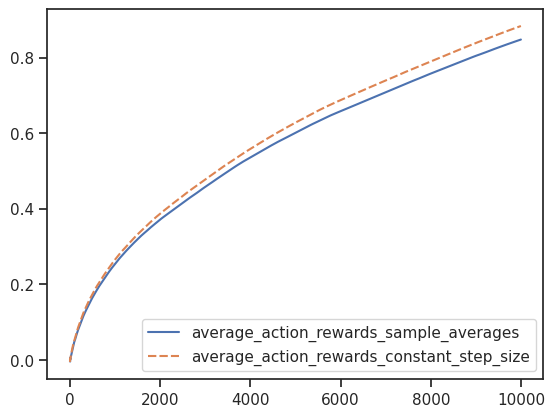

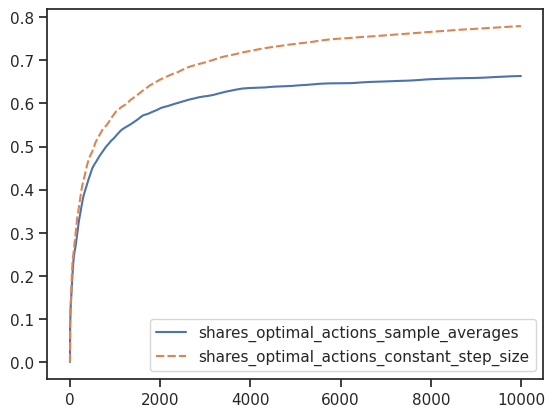

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'average_action_rewards_sample_averages': average_action_rewards_sample_averages,
    'average_action_rewards_constant_step_size': average_action_rewards_constant_step_size,
    'shares_optimal_actions_sample_averages': shares_optimal_actions_sample_averages,
    'shares_optimal_actions_constant_step_size': shares_optimal_actions_constant_step_size
})

sns.set_theme(style="ticks")

sns.lineplot(data=data[['average_action_rewards_sample_averages', 'average_action_rewards_constant_step_size']])
plt.show()

sns.lineplot(data=data[['shares_optimal_actions_sample_averages', 'shares_optimal_actions_constant_step_size']])
plt.show()